In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Extract: Load the dataset

In [2]:
dataset_path = "/content/null.csv"
data = pd.read_csv(dataset_path)

Transform: Data preprocessing

In [4]:
data

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


In [5]:
data.drop(['Transaction ID', 'Date', 'Shipping Address'], axis=1, inplace=True)

In [13]:
data['Amount'] = data['Amount'].str.replace('£', '').astype(float)

In [6]:
label_encoder = LabelEncoder()
categorical_columns = ['Day of Week', 'Type of Card', 'Entry Mode', 'Type of Transaction', 'Merchant Group',
                       'Country of Transaction', 'Country of Residence', 'Gender', 'Bank']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [18]:
preprocessed_path = "/content/null.csv"
data.to_csv(preprocessed_path, index=False)
print("Preprocessed data saved:", preprocessed_path)

Preprocessed data saved: /content/null.csv


Descriptive statistics

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
print("Descriptive Statistics:")
print(data.describe())

Descriptive Statistics:
         Day of Week           Time   Type of Card     Entry Mode  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        2.501370      14.562870       0.538120       0.830620   
std         0.501079       5.308195       0.498547       0.686699   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000      10.000000       0.000000       0.000000   
50%         3.000000      15.000000       1.000000       1.000000   
75%         3.000000      19.000000       1.000000       1.000000   
max         3.000000      24.000000       1.000000       2.000000   

             Amount  Type of Transaction  Merchant Group  \
count  99994.000000        100000.000000   100000.000000   
mean     112.578515             0.999710        4.484070   
std      123.433893             0.815596        2.888517   
min        5.000000             0.000000        0.000000   
25%       17.000000             0.000000        2.0000

Distribution of Fraud vs. Non-Fraud transactions

In [21]:
fraud_counts = data['Fraud'].value_counts()
print("\nFraud Counts:")
print(fraud_counts)


Fraud Counts:
0    92805
1     7195
Name: Fraud, dtype: int64


Pairplot to visualize relationships between numerical features

In [26]:
numerical_columns = ['Day of Week', 'Time', 'Amount', 'Age']
numerical_data = data[numerical_columns]


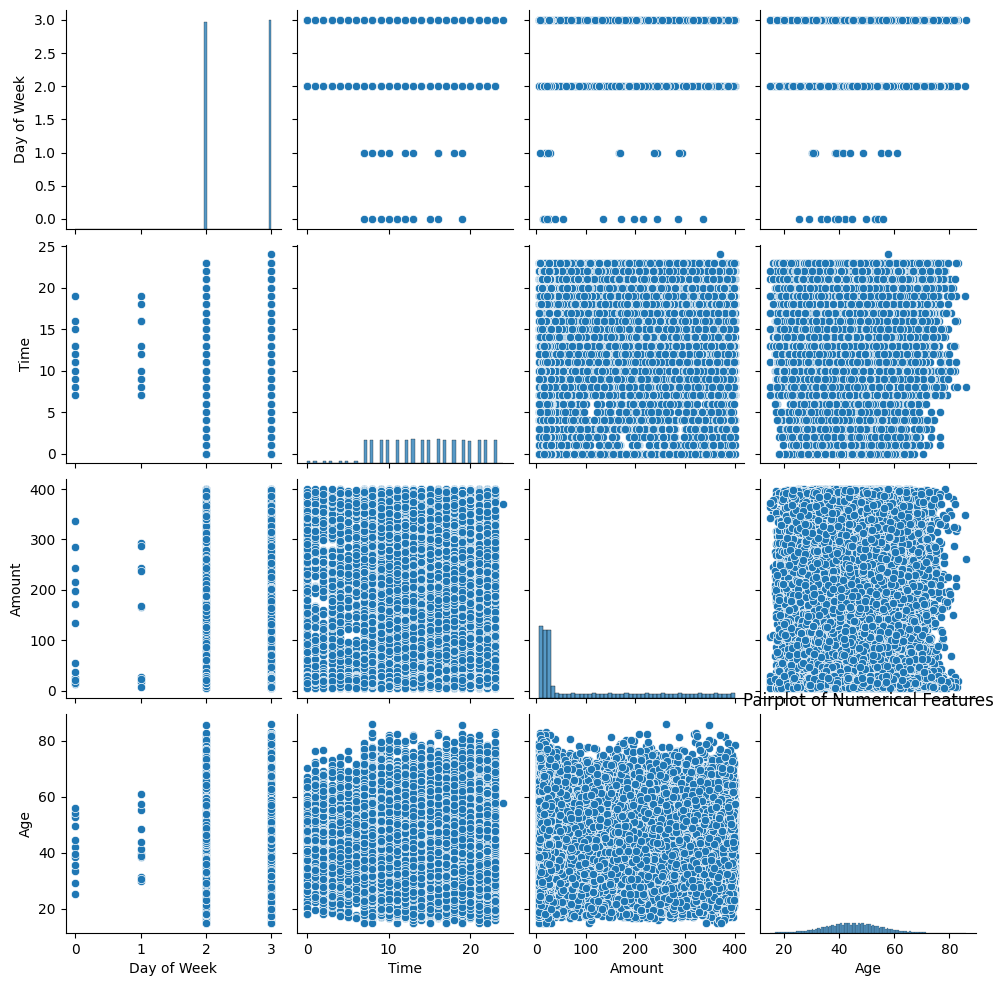

In [27]:
sns.pairplot(data=numerical_data)
plt.title("Pairplot of Numerical Features")
plt.show()

Correlation Heatmap

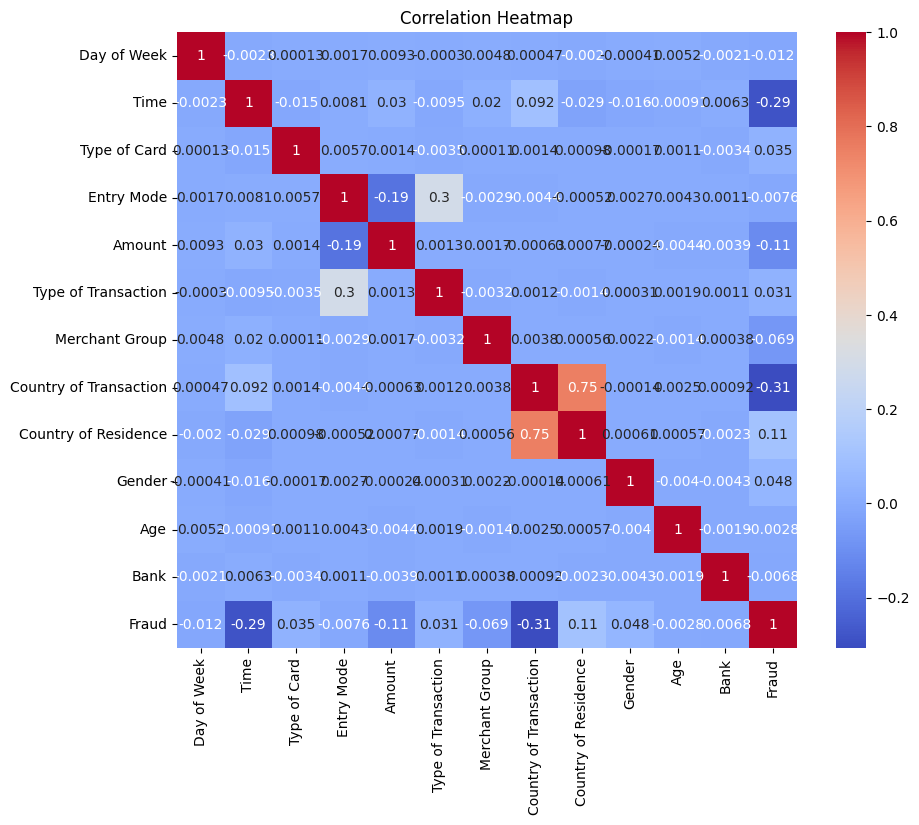

In [23]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Boxplot of Amount by Fraud status

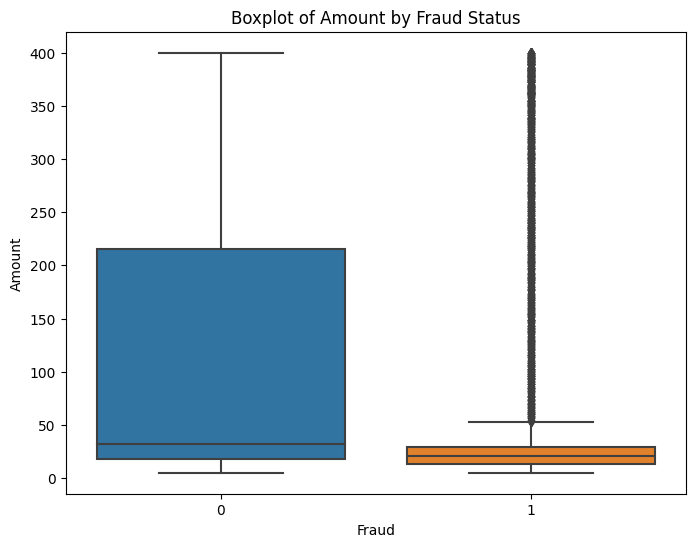

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fraud', y='Amount', data=data)
plt.title("Boxplot of Amount by Fraud Status")
plt.show()

Logistic regression

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
X = data.drop('Fraud', axis=1)
y = data['Fraud']


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(data['Amount'].dtype)

float64


In [33]:
if data['Amount'].dtype == 'object':
    data['Amount'] = data['Amount'].str.replace('£', '').astype(float)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [40]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [41]:
model = LogisticRegression(random_state=42)
model.fit(X_train_imputed, y_train)

LogisticRegression(random_state=42)

In [42]:
y_pred = model.predict(X_test_imputed)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [44]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18545
           1       0.79      0.55      0.65      1455

    accuracy                           0.96     20000
   macro avg       0.88      0.77      0.81     20000
weighted avg       0.95      0.96      0.95     20000



Decision Tree Classifier

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [47]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [48]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred = model.predict(X_test_imputed)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     18545
           1       0.80      0.85      0.82      1455

    accuracy                           0.97     20000
   macro avg       0.89      0.92      0.90     20000
weighted avg       0.97      0.97      0.97     20000



Critical evaluation

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)

In [57]:
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train_imputed, y_train)


LogisticRegression(random_state=42)

In [58]:
X_test_imputed = imputer.transform(X_test_scaled)

In [59]:
logistic_predictions = logistic_model.predict(X_test_imputed)

In [61]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [63]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [64]:
y_pred = model.predict(X_test_imputed)

In [72]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
decision_tree_model = DecisionTreeClassifier(random_state=42)

In [76]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

In [78]:
decision_tree_model.fit(X_train_imputed, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
decision_tree_predictions = decision_tree_model.predict(X_test_imputed)

In [80]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_classification_rep = classification_report(y_test, decision_tree_predictions)

In [81]:
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, decision_tree_predictions))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18545
           1       0.79      0.55      0.65      1455

    accuracy                           0.96     20000
   macro avg       0.88      0.77      0.81     20000
weighted avg       0.95      0.96      0.95     20000

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99     18545
           1       0.80      0.85      0.82      1455

    accuracy                           0.97     20000
   macro avg       0.89      0.92      0.90     20000
weighted avg       0.97      0.97      0.97     20000



In [83]:
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

In [84]:
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree'],
    'Accuracy': [logistic_accuracy, decision_tree_accuracy],
    'Correct Predictions': [sum(y_test == logistic_predictions), sum(y_test == decision_tree_predictions)],
    'Incorrect Predictions': [sum(y_test != logistic_predictions), sum(y_test != decision_tree_predictions)]
})

print("\nComparison Table:")
print(comparison_table)


Comparison Table:
                 Model  Accuracy  Correct Predictions  Incorrect Predictions
0  Logistic Regression   0.95660                19132                    868
1        Decision Tree   0.97325                19465                    535


Correlation Matrix

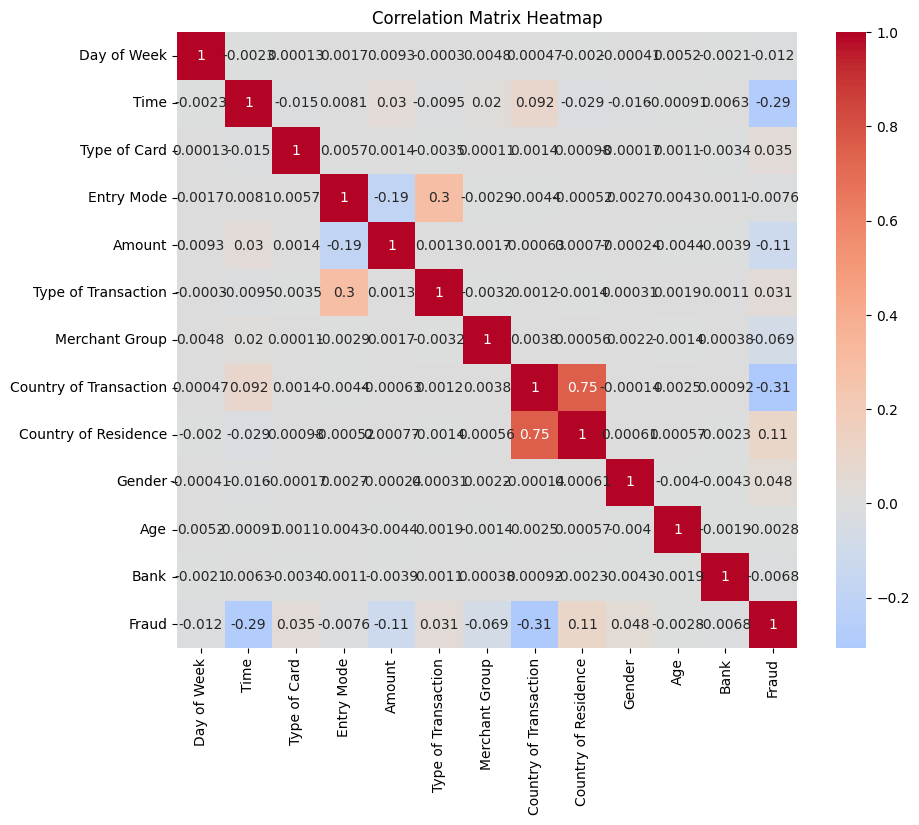

In [85]:
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()

Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [87]:
conf_matrix = confusion_matrix(y_test, decision_tree_predictions)

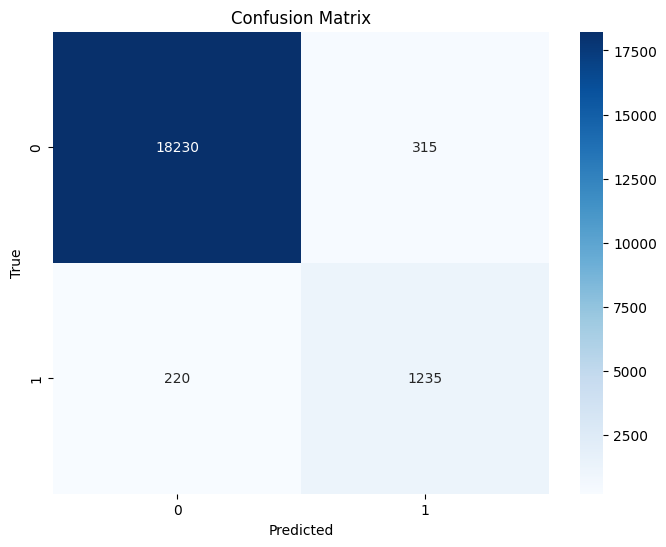

In [88]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

Model Comparison Bar Chart

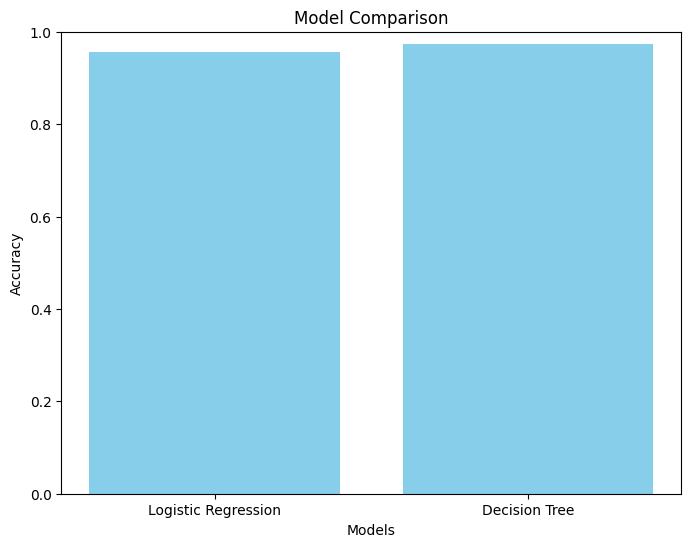

In [89]:
import matplotlib.pyplot as plt

model_names = ['Logistic Regression', 'Decision Tree']
accuracies = [logistic_accuracy, decision_tree_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()